Iteration= 0 | w= 0 , b= 0
Iteration= 1 | w= 0.15714285714285717 , b= 0.0
Iteration= 2 | w= 0.21151415692221331 , b= -0.041224908614597044
Iteration= 3 | w= 0.24238306520203587 , b= -0.09121337199390281
Iteration= 4 | w= 0.2668017560071029 , b= -0.14292835249479882
Iteration= 5 | w= 0.2891869277123573 , b= -0.19454924288611
Iteration= 6 | w= 0.3107734860309585 , b= -0.24557674772097926
Iteration= 7 | w= 0.3319183131903831 , b= -0.29587733565743374
Iteration= 8 | w= 0.3527280204705464 , b= -0.3454219634819209
Iteration= 9 | w= 0.37323683408469144 , b= -0.39421185552782917
Iteration= 10 | w= 0.39345785433707 , b= -0.44225705840061214
Iteration= 11 | w= 0.4133979756916899 , b= -0.4895701703063873
Iteration= 12 | w= 0.4330622625445548 , b= -0.5361644823256397
Iteration= 13 | w= 0.4524552388885542 , b= -0.5820534145138401
Iteration= 14 | w= 0.4715812676551395 , b= -0.6272503359706811
Iteration= 15 | w= 0.49044465965948736 , b= -0.6717685005060304
Iteration= 16 | w= 0.5090497018616956 , b= -

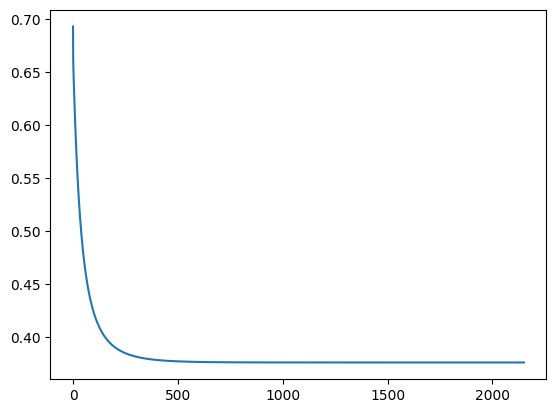

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


status = ["Cancer", "Cancer", "Cancer", "Cancer", "Cancer", "Cancer", "Cancer",
          "Healthy", "Healthy", "Healthy", "Healthy", "Healthy", "Healthy", "Healthy"]

psa_values = [3.8, 3.4, 2.9, 2.8, 2.7, 2.1, 1.6, 
              2.5, 2.0, 1.7, 1.4, 1.2, 0.9, 0.8]


# Transform data -> label / target -> 1 and 0
y_train = np.zeros(len(status), dtype=np.uint8)
for i, s in enumerate(status):
    if s == "Cancer":
        y_train[i] = 1

x_train = np.array(psa_values)


def model(w, b, x):
    z = w * x + b
    return 1 / (1 + np.exp(-z)) 

def loss(predict, actual):
    if (len(predict) == len(actual)):
        m = len(predict)
        total_diff = actual * np.log(predict) + (1 - actual) * np.log(1 - predict)
        return - (np.sum(total_diff) / m)
    else:
        print("the prediction and actual data lenght is not the same")

def gradient_w(predict, actual, feature):
    if (len(predict) == len(actual) == len(predict) == len(feature)):
        M = len(predict)
        return np.sum((y_predict - y_train) * x_train) / M
    else:
        print("the prediction and actual data lenght is not the same")


def gradient_b(predict, actual):
    if (len(predict) == len(actual)):
        M = len(predict)
        return np.sum(y_predict - y_train) / M
    else:
        print("the prediction and actual data lenght is not the same")

# Training
w = 0
b = 0
LEARNING_RATE = 0.5
CONVERGE_LIMIT = 0.00001
ITERATION = 10000


cost = []
for i in range(ITERATION):
    print(f"Iteration= {i} | w= {w} , b= {b}")
    y_predict = model(w,b,x_train)
    cost.append(loss(y_predict, y_train))

    g_w = gradient_w(y_predict, y_train, x_train)
    g_b = gradient_b(y_predict, y_train)

    w = w - LEARNING_RATE * g_w
    b = b - LEARNING_RATE * g_b
    
    if (abs(g_w) <= CONVERGE_LIMIT and abs(g_b) <= CONVERGE_LIMIT):
        print("Converged")
        break
    

print(w, b)
iteration = range(len(cost))
plt.plot(iteration, cost)


     Predict  Actual  Feature
0   0.990832       1      3.8
1   0.972994       1      3.4
2   0.901250       1      2.9
3   0.873974       1      2.8
4   0.840498       1      2.7
5   0.503546       1      2.1
6   0.204412       1      1.6
7   0.752630       0      2.5
8   0.435255       0      2.0
9   0.252690       0      1.7
10  0.129184       0      1.4
11  0.078896       0      1.2
12  0.036218       0      0.9
13  0.027762       0      0.8


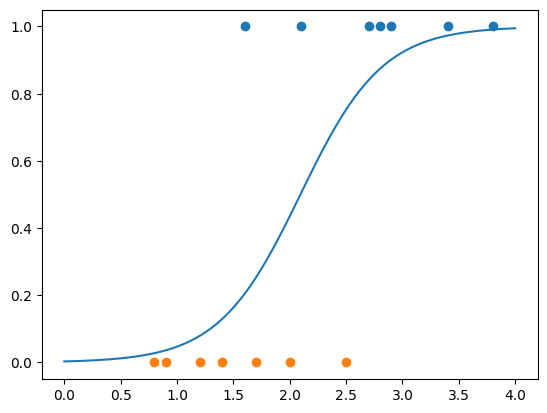

In [27]:
test = model(w, b, x_train)
data = pd.DataFrame({"Predict": model(w,b, x_train), "Actual": y_train, "Feature": x_train})
plot1 = data[data["Actual"] == 1]
plot2 = data[data["Actual"] == 0]
print(data)

x_smooth = np.linspace(0,4, 100)
plt.scatter(plot1["Feature"], plot1["Actual"])
plt.scatter(plot2["Feature"], plot2["Actual"])
plt.plot(x_smooth, model(w,b, x_smooth))